<a href="https://colab.research.google.com/github/HeiZemBerg/IAUFD-DataBase/blob/master/IAUFD_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tensorflow import keras
from keras import layers, applications
from keras.models import Sequential,Model
from keras.layers import Dense, Dropout,Flatten
from keras.layers import MaxPooling2D, Conv2D, SeparableConv2D, Input, concatenate, ActivityRegularization, Add
from keras.utils import load_img, plot_model, img_to_array
from keras.layers import BatchNormalization
from sklearn.model_selection import train_test_split

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm as tqdm
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unrar e '/content/drive/MyDrive/IAUFD/dataset.part1.rar' /content/dataset/ -idq

In [ ]:
data = pd.read_excel('/content/drive/MyDrive/IAUFD/IAUSD  Lable.xlsx')

In [ ]:
def Change_DF(data):
    df=pd.DataFrame()
    df['Image Number']=data['Image Number'].astype('int32')
    df['Gate']=data['Image Identification'].astype('int32')
    df['Start/Restart the game']=data['Unnamed: 2'].astype('int32')
    df['The joy of the players']=data['Unnamed: 3'].astype('int32')
    df['yellow card']=data['Unnamed: 4'].astype('int32')
    df['Red Card']=data['Unnamed: 5'].astype('int32')
    df['Ball']=data['Unnamed: 6'].astype('int32')
    df['Stadium View']=data['Unnamed: 7'].astype('int32')
    df['referee Image']=data['Unnamed: 8'].astype('int32')
    df['Penalty Image']=data['Unnamed: 9'].astype('int32')
    df['Free Kick']=data['Unnamed: 10'].astype('int32')

    return df 

In [ ]:
data=data.iloc[1:]
data['Unnamed: 8']=data['Unnamed: 8'].replace(' ',1)
data['Unnamed: 8']=data['Unnamed: 8'].replace(11,1)
data['Unnamed: 6']=data['Unnamed: 6'].replace(11,1)
data['Unnamed: 10']=data['Unnamed: 10'].replace(11,1)
data['Image Identification']=data['Image Identification'].replace(11,1)


<ipython-input-7-00e4b69551f1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Unnamed: 8']=data['Unnamed: 8'].replace(' ',1)
<ipython-input-7-00e4b69551f1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Unnamed: 8']=data['Unnamed: 8'].replace(11,1)
<ipython-input-7-00e4b69551f1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [ ]:
data=Change_DF(data)
display(data)

,Image Number,Gate,Start/Restart the game,The joy of the players,yellow card,Red Card,Ball,Stadium View,referee Image,Penalty Image,Free Kick
1,1,0,0,0,0,0,0,1,0,0,0
2,2,0,0,0,0,0,0,1,1,0,0
3,3,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,1,0,0
5,5,0,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99996,99996,0,0,0,0,0,1,0,1,0,0
99997,99997,0,0,0,0,0,0,0,0,0,0
99998,99998,0,0,0,0,0,0,0,0,0,0
99999,99999,0,0,0,0,0,0,0,1,0,0


In [ ]:
 print(data['Gate'].value_counts())

0    75991
1    24009
Name: Gate, dtype: int64


In [ ]:
image_directory = '/content/dataset/'
SIZE = 100
X = []
for i in range(1,10001):
  img = load_img(image_directory + str(data['Image Number'][i]) + '.jpg' , target_size=(SIZE,SIZE,3))
  img = img_to_array(img)
  img=img/255.
  X.append(img)

In [ ]:
X=np.array(X)
y=np.array(data.iloc[:10000].drop(['Image Number','Gate'] , axis=1))
y=np.array(y)

In [ ]:
print(f'X_shape: {X.shape}')
print(f'y_shape: {y.shape}')

X_shape: (10000, 100, 100, 3)
y_shape: (10000, 9)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

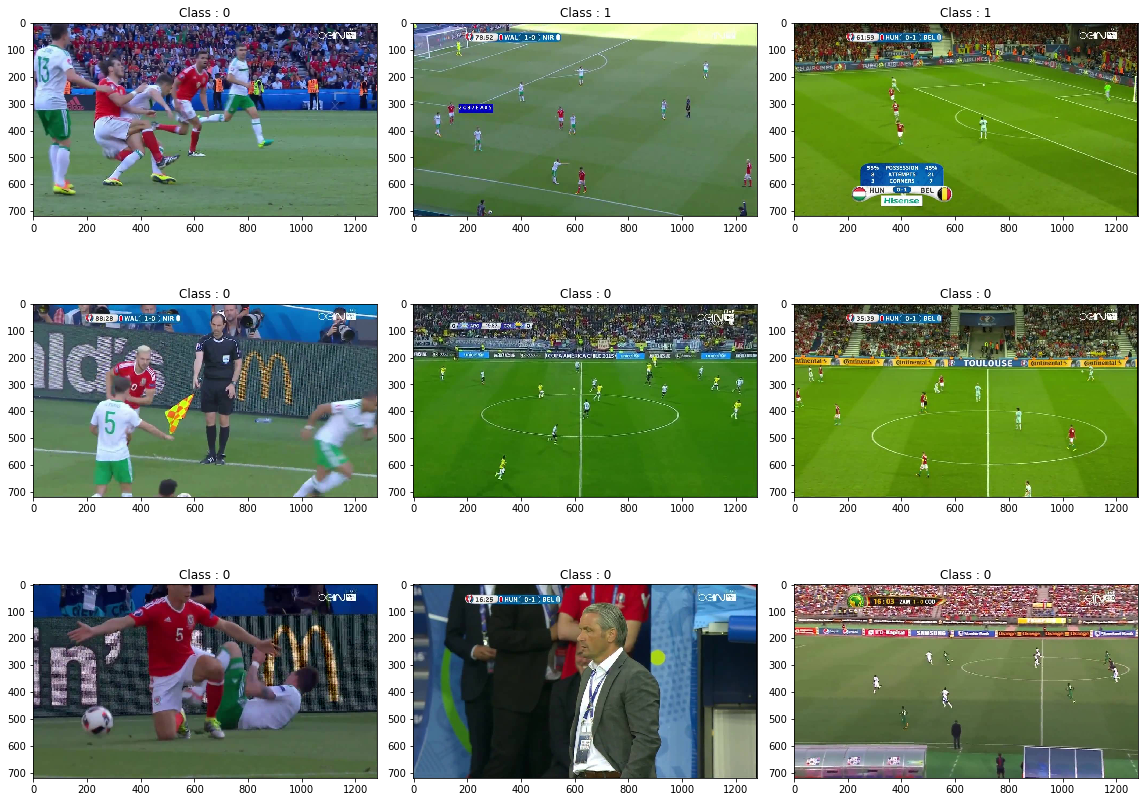

In [ ]:
import random
import matplotlib.pyplot as plt


plt.rcParams['figure.figsize'] = (16,12) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))

    plt.imshow(load_img('/content/dataset/' + str(data['Image Number'][num]) + '.jpg'), cmap='gray', interpolation='none')
   
    plt.title(f"Class : {data['Gate'].iloc[num-1]}")
  
plt.tight_layout()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 98, 98, 16)   448         ['input_4[0][0]']                
                                                                                                  
 batch_normalization_21 (BatchN  (None, 98, 98, 16)  64          ['conv2d_30[0][0]']              
 ormalization)                                                                                    
                                                                                            

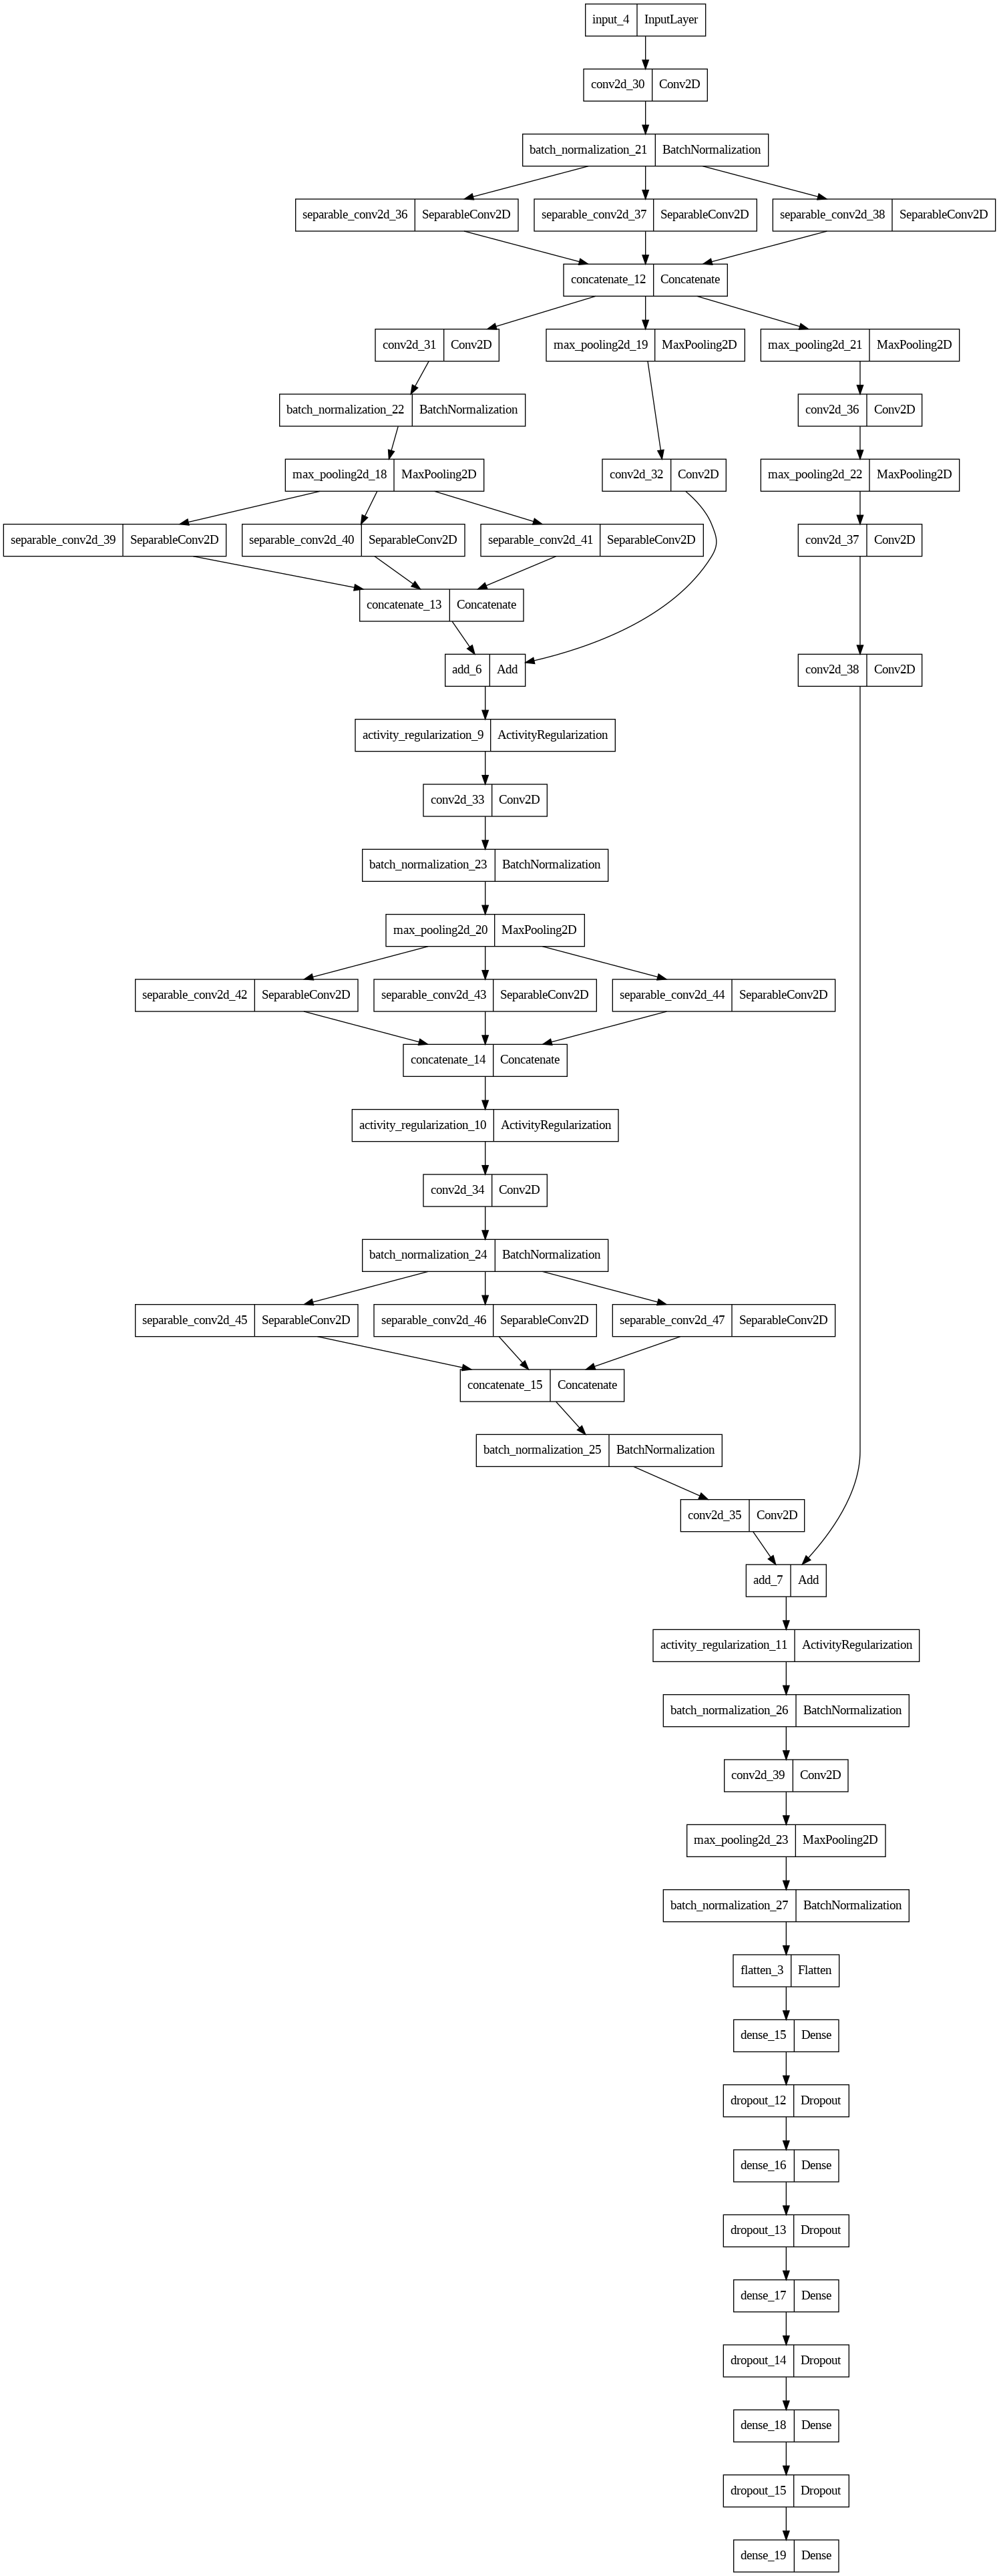

In [42]:
input_flow= Input(shape=(100,100,3))
x = Conv2D(16,(3,3),activation='relu')(input_flow)
x = BatchNormalization()(x)

x1 = SeparableConv2D(16,(3,3),activation='relu',padding='same')(x)
x2 = SeparableConv2D(16,(5,5),activation='relu',padding='same')(x)
x3 = SeparableConv2D(16,(7,7),activation='relu',padding='same')(x)

x_2 = x_1 = x = concatenate([x1,x2,x3])

x = Conv2D(32,(5,5),activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x1 = SeparableConv2D(32,(3,3),activation='relu',padding='same')(x)
x2 = SeparableConv2D(32,(5,5),activation='relu',padding='same')(x)
x3 = SeparableConv2D(32,(7,7),activation='relu',padding='same')(x)

x = concatenate([x1,x2,x3])

x_1 = MaxPooling2D(2,2)(x_1)
x_1 = Conv2D(96,(3,3),activation='relu')(x_1)

x = Add()([x_1,x])
x = ActivityRegularization(l1=0.001, l2=0.001)(x)

x = Conv2D(64,(5,5),activation='relu')(x)
x = BatchNormalization()(x)
x = MaxPooling2D(2,2)(x)

x1 = SeparableConv2D(64,(3,3),activation='relu',padding='same')(x)
x2 = SeparableConv2D(64,(5,5),activation='relu',padding='same')(x)
x3 = SeparableConv2D(64,(7,7),activation='relu',padding='same')(x)

x = concatenate([x1,x2,x3])



x = ActivityRegularization(l1=0.001, l2=0.001)(x)
x = Conv2D(128,(5,5),activation='relu')(x)
x = BatchNormalization()(x)

x1 = SeparableConv2D(128,(3,3),activation='relu',padding='same')(x)
x2 = SeparableConv2D(128,(5,5),activation='relu',padding='same')(x)
x3 = SeparableConv2D(128,(7,7),activation='relu',padding='same')(x)

x = concatenate([x1,x2,x3])
x = BatchNormalization()(x)

x = Conv2D(256,(7,7),activation='elu')(x)

x_2 = MaxPooling2D(2,2)(x_2)
x_2 = Conv2D(128,(3,3),activation='relu')(x_2)
x_2 = MaxPooling2D(2,2)(x_2)
x_2 = Conv2D(128,(7,7),activation='relu')(x_2)
x_2 = Conv2D(256,(7,7),activation='relu')(x_2)
x = Add()([x_2,x])

x = ActivityRegularization(l1=0.001, l2=0.001)(x)
x = BatchNormalization()(x)

x = Conv2D(512,(7,7),activation='elu')(x)
x = MaxPooling2D(2,2)(x)
x = BatchNormalization()(x)

x = layers.Flatten()(x)
x = layers.Dense(128, activation='tanh')(x)
x = Dropout(0.5)(x)
x = layers.Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(32, activation='relu')(x)
x = Dropout(0.5)(x)
x = layers.Dense(16, activation='tanh')(x)
x = Dropout(0.5)(x)
x = layers.Dense(9, activation='softmax')(x)

model=Model(input_flow,x)
model.summary()
plot_model(model)

In [43]:
model.compile(optimizer='Adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
history = model.fit(X_train, y_train,epochs=100, batch_size=256, validation_split=0.2)

Epoch 1/100
22/22 [==============================] - 79s 1s/step - loss: 41.6150 - accuracy: 0.0702 - val_loss: 2.1863 - val_accuracy: 0.1243
Epoch 2/100
22/22 [==============================] - 25s 1s/step - loss: 13.3349 - accuracy: 0.0900 - val_loss: 2.0949 - val_accuracy: 0.1243
Epoch 3/100
22/22 [==============================] - 24s 1s/step - loss: 9.0403 - accuracy: 0.1145 - val_loss: 2.1389 - val_accuracy: 0.1243
Epoch 4/100
22/22 [==============================] - 24s 1s/step - loss: 7.1840 - accuracy: 0.1221 - val_loss: 2.1752 - val_accuracy: 0.1243
Epoch 5/100
22/22 [==============================] - 24s 1s/step - loss: 6.8593 - accuracy: 0.1448 - val_loss: 2.1528 - val_accuracy: 0.1243
Epoch 6/100
22/22 [==============================] - 23s 1s/step - loss: 5.6112 - accuracy: 0.1437 - val_loss: 2.1455 - val_accuracy: 0.1243
Epoch 7/100
22/22 [==============================] - 24s 1s/step - loss: 4.9501 - accuracy: 0.1511 - val_loss: 2.1231 - val_accuracy: 0.1243
Epoch 8/100

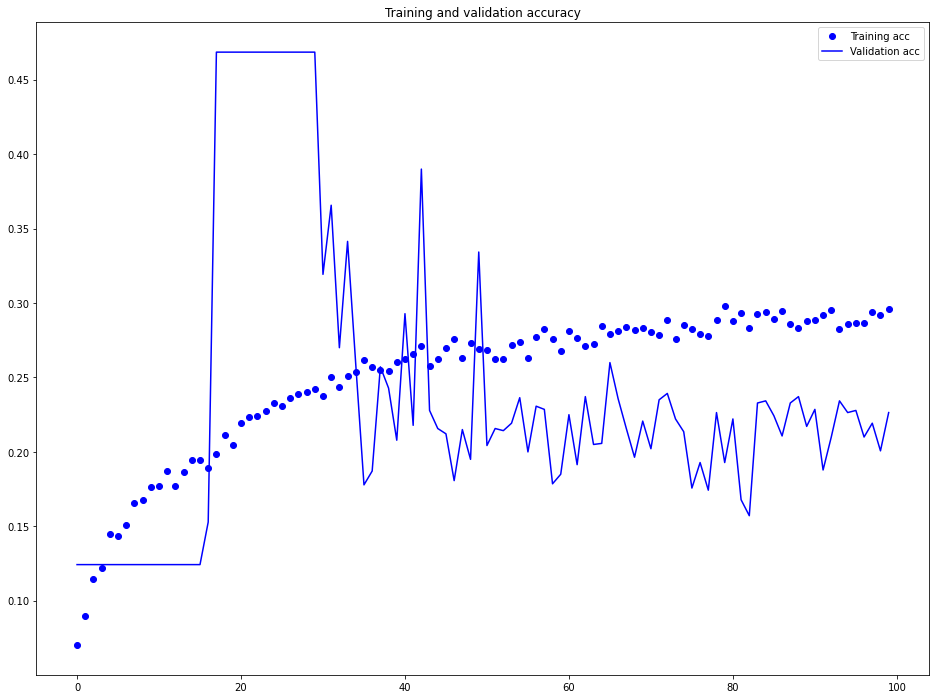

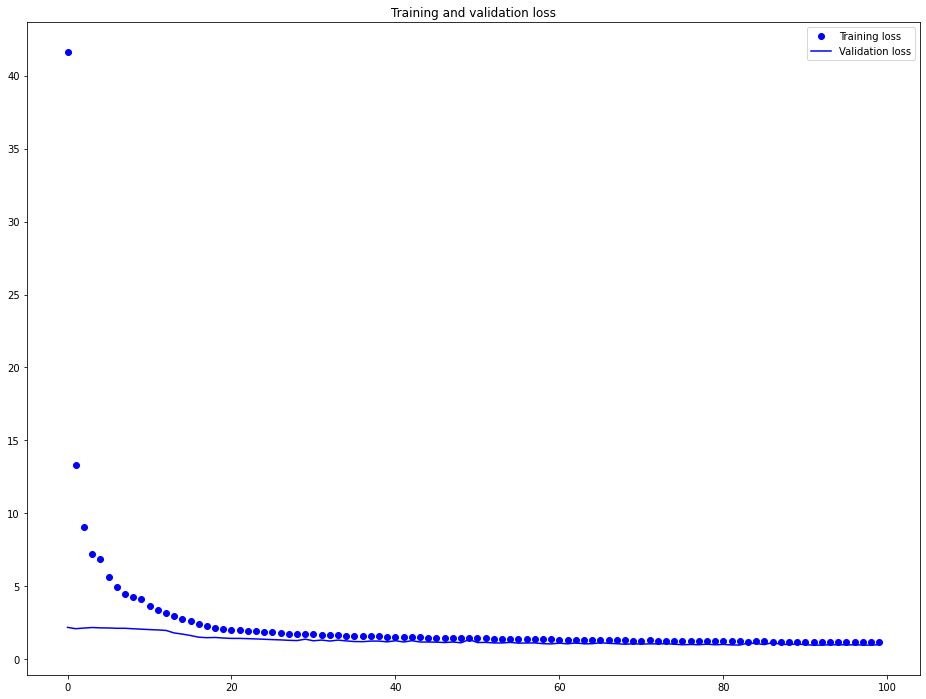

In [45]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()